In [1]:
#Basic libraries required for data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries required for string processing and finding mean
import re
import statistics

#Libraries required for Machine Learning on selected data related to only movies
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, utils
from keras import models, layers
from keras.optimizers import SGD
#from keras.utils import normalize

%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pd.read_csv('completeData.csv', encoding='utf-8')
data.head()

,Name,Year,Type,Genre,MovieScore,Metascore,Duration,MovieColor,MovieLanguage,MovieWorldwideGross,MovieURL,Total_Votes
0,The Lion King,2019,Movie,"['Animation', 'Adventure', 'Drama', 'Family', ...",7.1,55,118,Color,English,1564549294,https://www.imdb.com/title/tt6105098/,95301
1,Once Upon a Time... in Hollywood,2019,Movie,"['Comedy', 'Drama']",8.0,83,161,Color,English,283722549,https://www.imdb.com/title/tt7131622/,164018
2,Joker,2019,Movie,"['Crime', 'Drama', 'Thriller']",9.6,75,122,Color,English,0,https://www.imdb.com/title/tt7286456/,7756
3,Stranger Things,-,TV Series,"['Drama', 'Fantasy', 'Horror', 'Mystery', 'Sci...",8.8,0,51,Color,English,0,https://www.imdb.com/title/tt4574334/,654652
4,La Casa de Papel,-,TV Series,"['Action', 'Crime', 'Mystery', 'Thriller']",8.6,0,70,Color,Serbian,0,https://www.imdb.com/title/tt6468322/,158703


In [3]:
data.isnull().any()

Name                   False
Year                   False
Type                   False
Genre                  False
MovieScore             False
Metascore              False
Duration               False
MovieColor             False
MovieLanguage          False
MovieWorldwideGross    False
MovieURL               False
Total_Votes            False
dtype: bool

In [4]:
data.shape

(5027, 12)

In [60]:
data.describe()

,MovieScore,Metascore,MovieWorldwideGross,Total_Votes
count,5027.000000,5027.000000,5.027000e+03,5.027000e+03
mean,6.894251,39.180426,9.463118e+07,1.191960e+05
std,1.066340,31.419341,1.939023e+08,1.799111e+05
min,1.700000,0.000000,0.000000e+00,1.700000e+01
25%,6.300000,0.000000,0.000000e+00,1.420400e+04
50%,7.000000,46.000000,1.471098e+07,5.884400e+04
75%,7.600000,65.000000,1.025041e+08,1.491915e+05
max,9.600000,100.000000,2.796255e+09,2.130344e+06


In [6]:
#Printing the name and type of the top 30 shows based on the iMDB Ratings (MovieScore)
topRated30 = data.sort_values('MovieScore', ascending = False)[['Name', 'Type', 'MovieScore']][:30]
topRated30

,Name,Type,MovieScore
2,Joker,Movie,9.6
1077,Pew News,TV Series,9.6
3238,Critical Role,TV Series,9.5
2001,Family of Thakurganj,Movie,9.5
40,Breaking Bad,TV Series,9.5
4510,Wu-Tang: An American Saga,TV Series,9.4
16,Game of Thrones,TV Series,9.4
146,The Wire,TV Series,9.3
94,Rick and Morty,TV Series,9.3
642,Ardaas Karaan,Movie,9.3


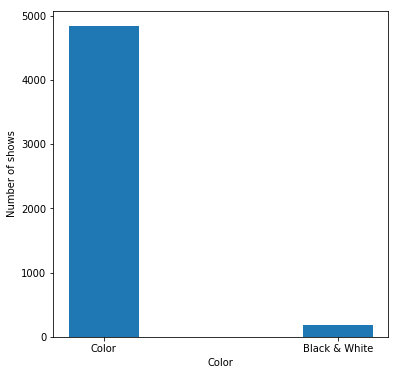

In [7]:
#Plotting the number of shows(including movies and tv-series) based on the type of color
colorCount = data.MovieColor.value_counts()
plt.figure(1, figsize=(6, 6))
plt.bar([0, 1], colorCount, width=0.3)
plt.xticks([0,1], ["Color", "Black & White"])
plt.xlabel('Color')
plt.ylabel('Number of shows')
plt.show()

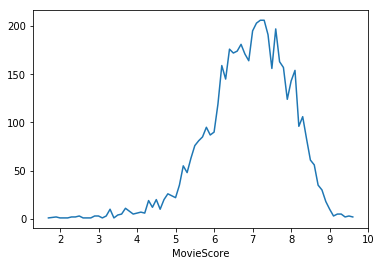

In [8]:
#Plotting the distribution of iMDB Scores
'''
scores = data.MovieScore.unique()
scoreCount = data.MovieScore.value_counts().sort_index(axis = 0, ascending = True)
print(scoreCount)
plt.plot(scores, scoreCount)
plt.xlabel("Score")
plt.ylabel("Number of Movies")
plt.show()
'''
dataScoreGroup = data.groupby(['MovieScore'])['Name'].count()
dataScoreGroup.plot()

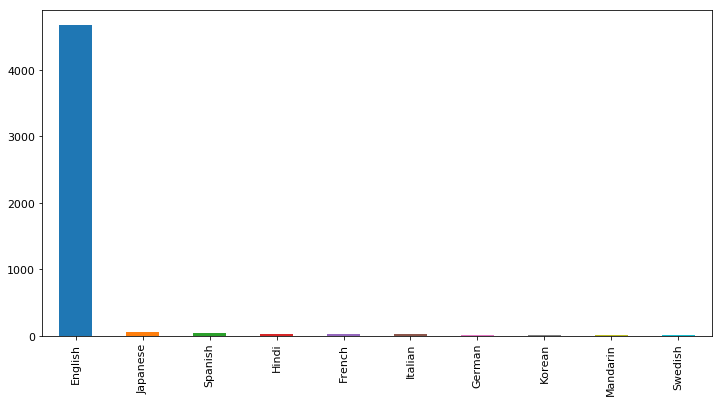

In [61]:
#Plotting the number of movies with respect to the top 10 language
languageList = data.MovieLanguage.value_counts()
plt.figure(1, figsize=(12, 6))
languageList[:10].plot(kind = "bar")
plt.show()

In [63]:
#Plotting the number of shows (Movies and TV_Series) with respect to their Genre
genreData = data['Genre'].str.split(',')
genre = []
genreDict = {}
for glist in genreData:
    for item in glist:
        item = re.findall(r'\'(.*?)\'', item)[0]
        genre.append(item)
        if item not in genreDict:
            genreDict[item] = 1
        else:
            genreDict[item] = genreDict[item]+1



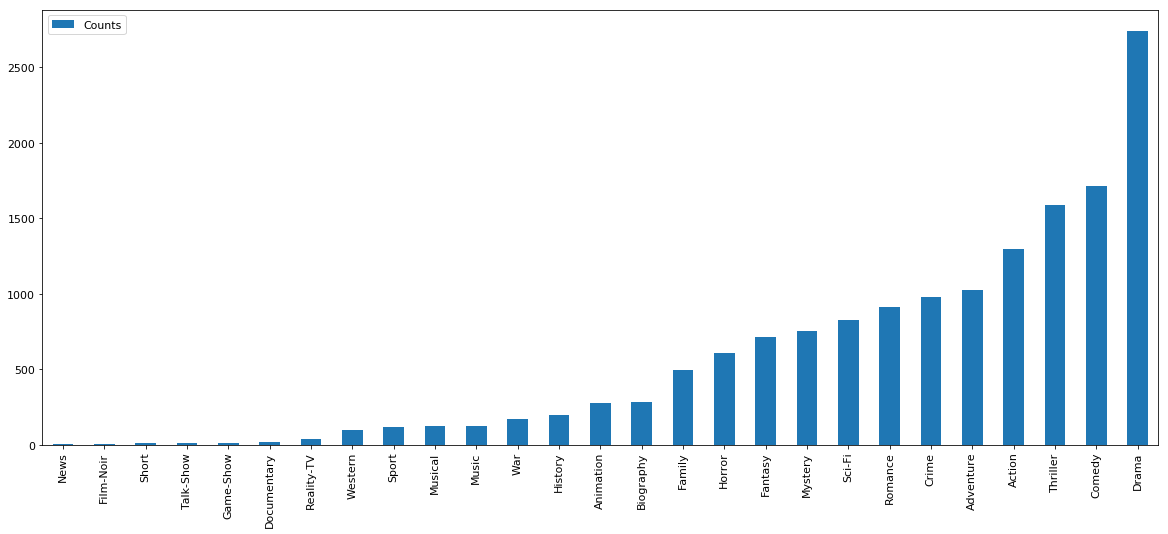

In [62]:
Gen = pd.DataFrame.from_dict(genreDict, orient = 'index')
Gen.columns = ['Counts']
Gen = Gen.sort_values('Counts', ascending = True)
Gen.plot(kind = 'bar', figsize=(20, 8))
plt.show()

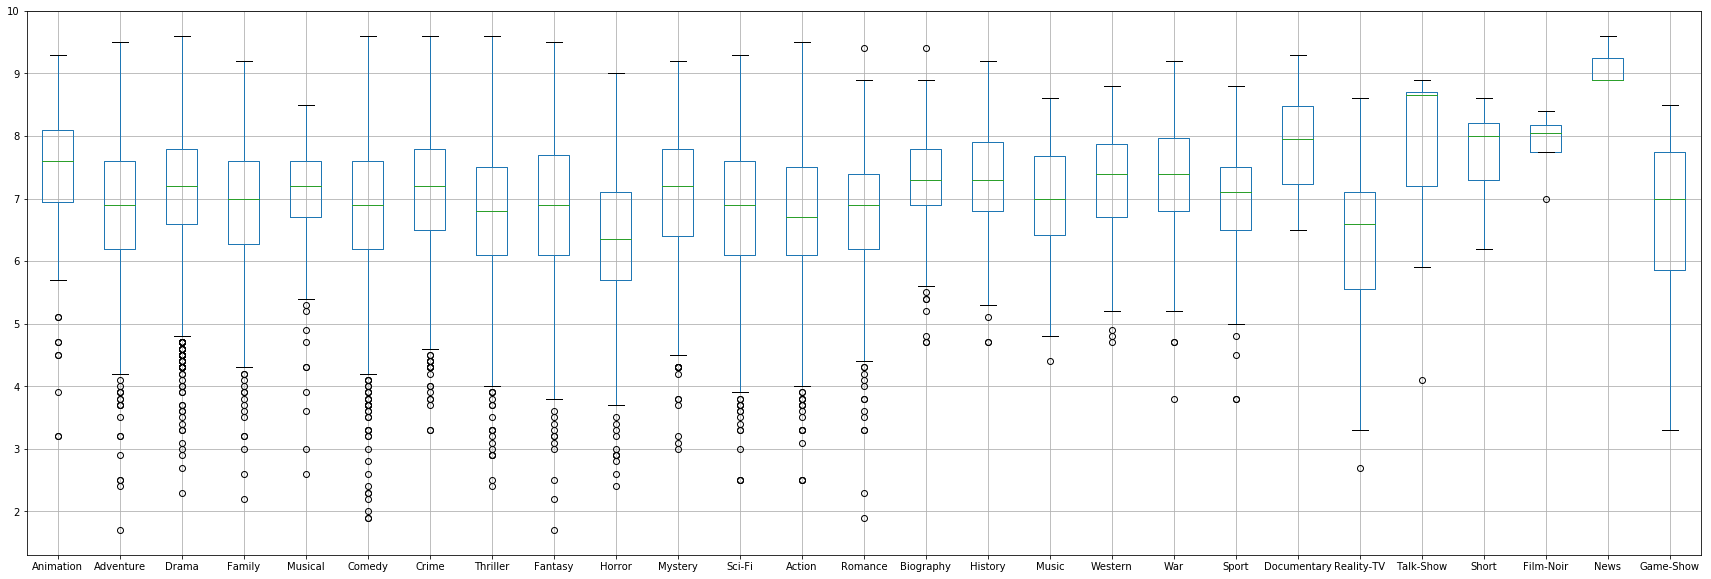

In [11]:
#Boxplot to identify relationship between the MovieScore and their respective genre list
genreScoreDict = {}
for item in genre:
    if item not in genreScoreDict:
        genreScoreDict[item] = []
        

for record in data.iterrows():
    #print(record[1][3])
    glist = record[1][3].split(',')
    glist = [re.findall(r'\'(.*?)\'', x)[0] for x in glist]
    for item in glist:
        genreScoreDict[item].append(record[1][4])
'''      
genreScoreFinal = {}
for item in genre:
    genreScoreFinal[item] = statistics.mean(genreScoreDict[item])
''' 
#print(genreScoreFinal)
GenScore = pd.DataFrame.from_dict(genreScoreDict, orient = 'index')
#GenScore.columns = [""]
#print(GenScore)
plt.figure(1, figsize=(30, 10))
GenScore.transpose().boxplot()
plt.show()

In [65]:
GenScore[:10].transpose().describe()

,Animation,Adventure,Drama,Family,Musical,Comedy,Crime,Thriller,Fantasy,Horror
count,279.000000,1026.000000,2743.000000,496.000000,123.000000,1714.000000,976.000000,1587.000000,712.000000,608.000000
mean,7.465233,6.821248,7.131863,6.822581,6.961789,6.839323,7.074693,6.751229,6.838624,6.349013
std,0.970042,1.078977,0.960920,1.086154,1.050099,1.066425,1.006953,1.063544,1.159543,1.085671
min,3.200000,1.700000,2.300000,2.200000,2.600000,1.900000,3.300000,2.400000,1.700000,2.400000
25%,6.950000,6.200000,6.600000,6.275000,6.700000,6.200000,6.500000,6.100000,6.100000,5.700000
50%,7.600000,6.900000,7.200000,7.000000,7.200000,6.900000,7.200000,6.800000,6.900000,6.350000
75%,8.100000,7.600000,7.800000,7.600000,7.600000,7.600000,7.800000,7.500000,7.700000,7.100000
max,9.300000,9.500000,9.600000,9.200000,8.500000,9.600000,9.600000,9.600000,9.500000,9.000000


In [13]:
#Extracting the data for only movies
movieData = data[data.Type == 'Movie']
movieData.shape

(3732, 12)

In [70]:
movieData.head()

,Name,Year,Type,Genre,MovieScore,Metascore,Duration,MovieColor,MovieLanguage,MovieWorldwideGross,MovieURL,Total_Votes
0,The Lion King,2019,Movie,"['Animation', 'Adventure', 'Drama', 'Family', ...",7.1,55,118,Color,English,1564549294,https://www.imdb.com/title/tt6105098/,95301
1,Once Upon a Time... in Hollywood,2019,Movie,"['Comedy', 'Drama']",8.0,83,161,Color,English,283722549,https://www.imdb.com/title/tt7131622/,164018
9,Spider-Man: Far from Home,2019,Movie,"['Action', 'Adventure', 'Sci-Fi']",7.9,69,129,Color,English,1122182596,https://www.imdb.com/title/tt6320628/,159116
11,Avengers: Endgame,2019,Movie,"['Action', 'Adventure', 'Sci-Fi']",8.6,78,181,Color,English,2796255402,https://www.imdb.com/title/tt4154796/,544683
14,The Lion King,1994,Movie,"['Animation', 'Adventure', 'Drama', 'Family', ...",8.5,88,88,Color,English,968511805,https://www.imdb.com/title/tt0110357/,858561


In [15]:
movieData[['Duration']] = movieData[['Duration']].astype('int')

c:\users\himadri s chatterjee\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [58]:
print(movieData.describe())
#print("\nDescribing the data on Movie:\n\n",movieData.dtypes)

        MovieScore    Metascore     Duration  MovieWorldwideGross  \
count  3149.000000  3149.000000  3149.000000         3.149000e+03   
mean      6.745094    59.003493   112.537949         1.495425e+08   
std       0.944508    17.837105    20.133076         2.273137e+08   
min       1.900000     5.000000    64.000000         5.760000e+02   
25%       6.200000    46.000000    98.000000         1.898874e+07   
50%       6.800000    59.000000   109.000000         6.791866e+07   
75%       7.400000    72.000000   123.000000         1.839361e+08   
max       9.300000   100.000000   321.000000         2.796255e+09   

        Total_Votes  
count  3.149000e+03  
mean   1.670515e+05  
std    2.033072e+05  
min    8.100000e+01  
25%    4.690900e+04  
50%    1.034160e+05  
75%    2.086010e+05  
max    2.130344e+06  


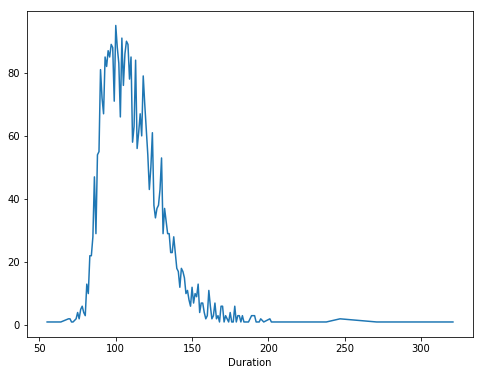

In [17]:
#Plotting distribution of number of movies with respect to their duration
    movieDurationGroup = movieData.groupby(['Duration'])['Name'].count().sort_index(axis=0, ascending = True)
    #print(movieDurationGroup)
    movieDurationGroup.plot(figsize = (8, 6))

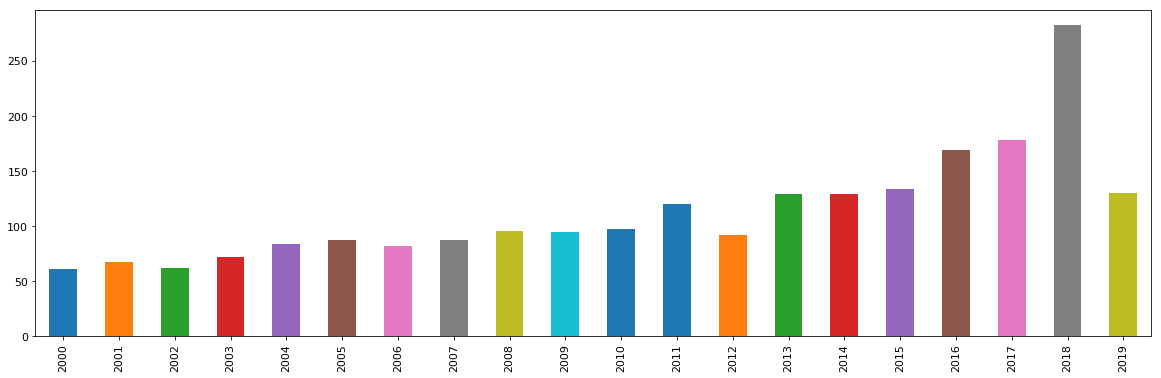

In [72]:
year = movieData.Year.value_counts().sort_index(axis = 0, ascending = True)
#print(year)
plt.figure(1, figsize=(20, 6))
year[-20:].plot(kind = 'bar')
plt.show()

In [19]:
#Extracting those movies with valid amount in Worldwide Gross.
movieData = movieData[movieData.MovieWorldwideGross != 0]
movieData = movieData[movieData.Metascore != 0]

In [20]:
#Finding the  correlation between the attributes of the data on Movies
movieData.corr()

,MovieScore,Metascore,Duration,MovieWorldwideGross,Total_Votes
MovieScore,1.000000,0.724224,0.376423,0.161014,0.500107
Metascore,0.724224,1.000000,0.266487,0.092492,0.324511
Duration,0.376423,0.266487,1.000000,0.249725,0.325618
MovieWorldwideGross,0.161014,0.092492,0.249725,1.000000,0.537208
Total_Votes,0.500107,0.324511,0.325618,0.537208,1.000000


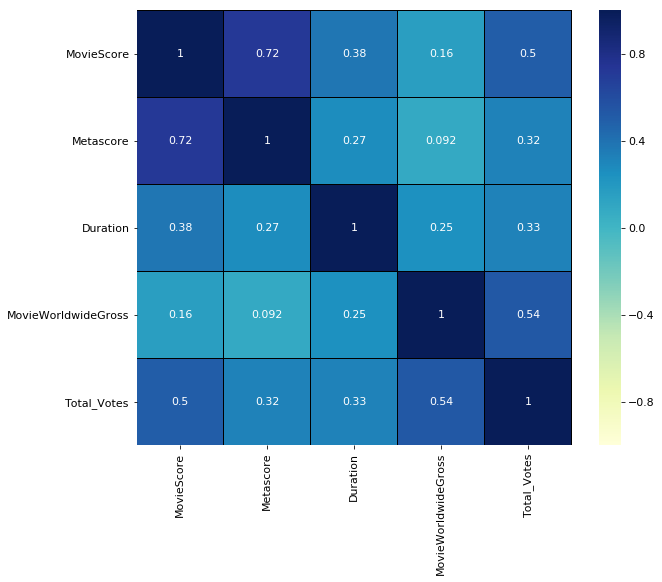

In [73]:
#Plotting the heatmap of Pearson's Correlation
plt.figure(1, figsize=(10,8))
sns.heatmap(movieData.corr(), linewidths = 0.5, vmax = 1, vmin = -1, annot = True, cmap='YlGnBu', square = True, linecolor = 'Black')

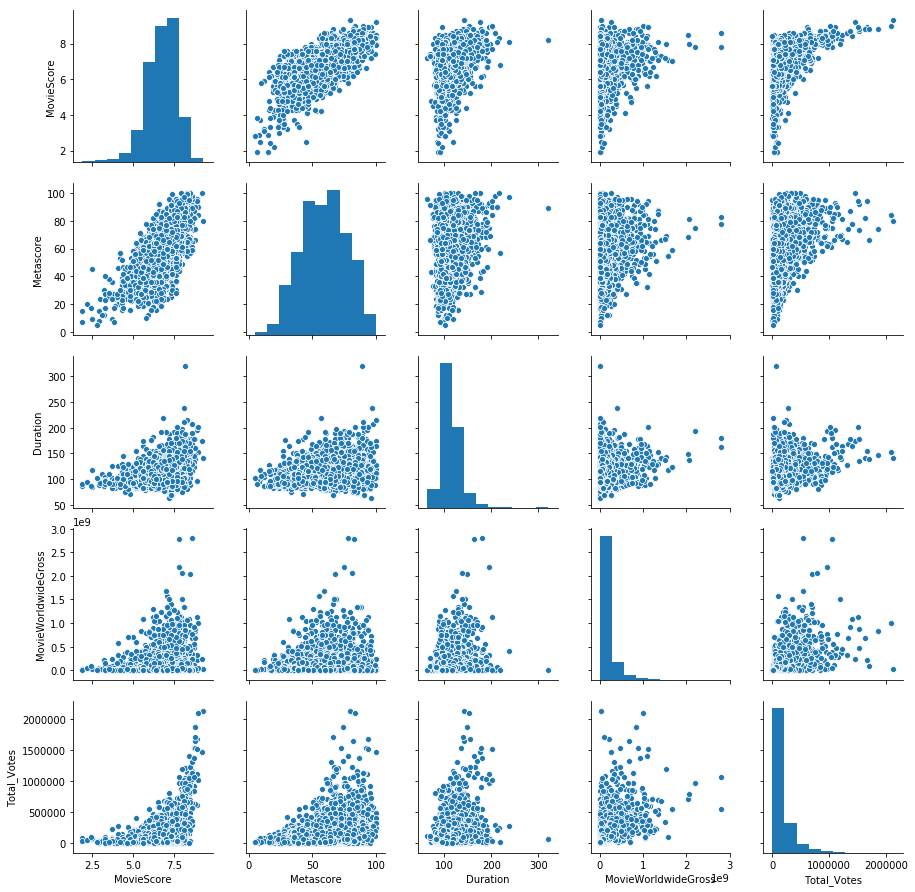

In [22]:
sns.pairplot(movieData[['MovieScore', 'Metascore', 'Duration', 'MovieWorldwideGross', 'Total_Votes']])

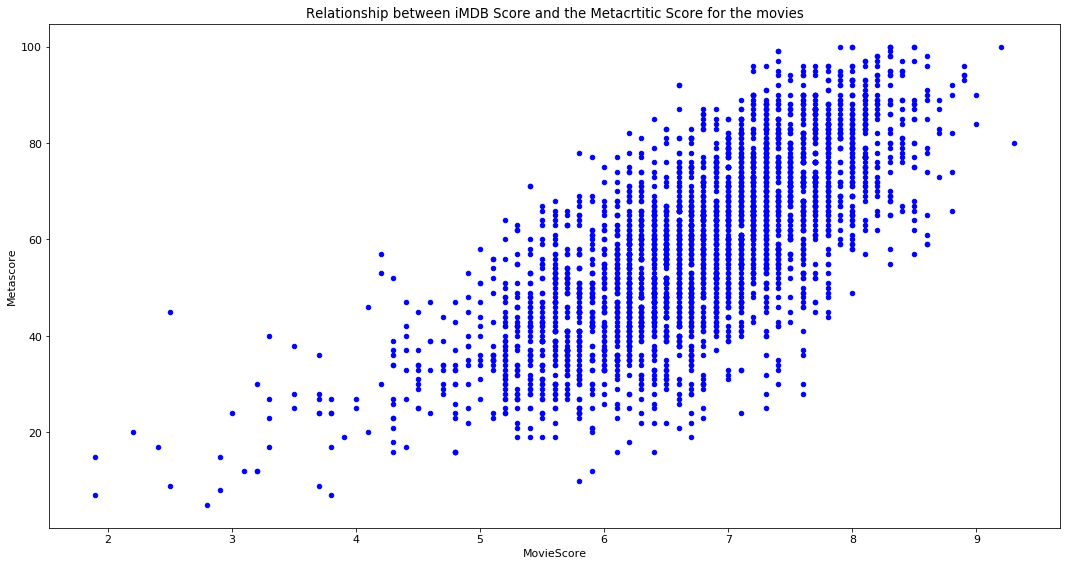

In [23]:
# Scatter Plots between various attributes of the movieData dataset.
#1. MovieScore vs Metascore
plt.rcParams['font.size'] = 11
#plt.figure(figsize=(10, 10))
plt.rcParams['figure.figsize'] = (15.0, 8.0)
movieData.plot(kind = 'scatter', x='MovieScore', y='Metascore', color='Blue')
plt.title("Relationship between iMDB Score and the Metacrtitic Score for the movies")
plt.tight_layout()

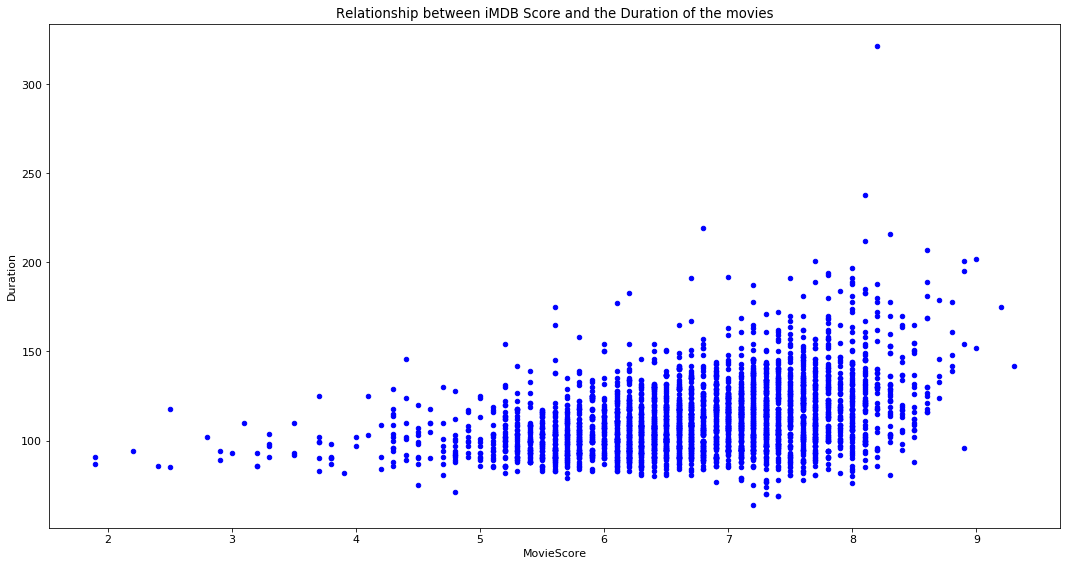

In [24]:
#2. MovieScore vs Duration
plt.rcParams['font.size'] = 11
plt.rcParams['figure.figsize'] = (15.0, 8.0)
movieData.plot(kind = 'scatter', x='MovieScore', y='Duration', color='Blue')
plt.title("Relationship between iMDB Score and the Duration of the movies")
plt.tight_layout()

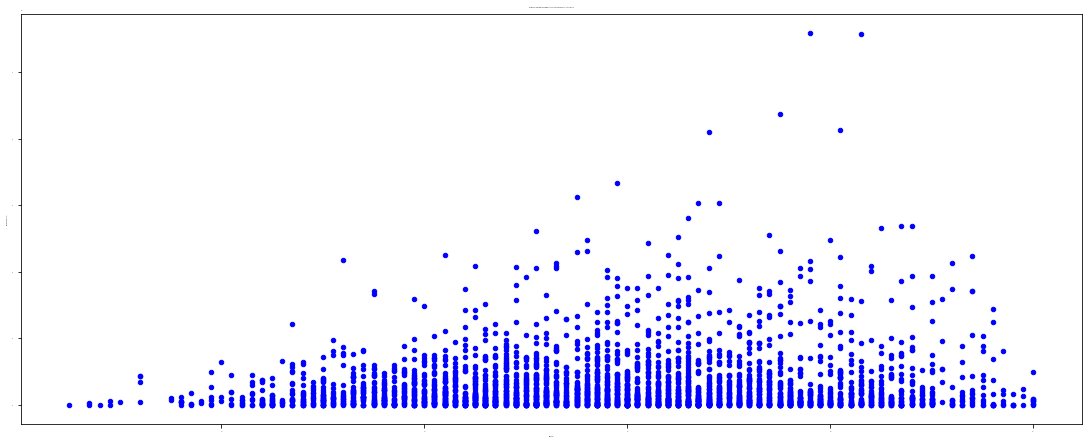

In [75]:
#3. Metascore vs Duration
plt.rcParams['font.size'] = 1
plt.rcParams['figure.figsize'] = (15.0, 6.0)
movieData.plot(kind = 'scatter', x='Metascore', y='MovieWorldwideGross', color='Blue')
plt.title("Relationship between the Metacritic Score and the Duration of the movies")
plt.tight_layout()

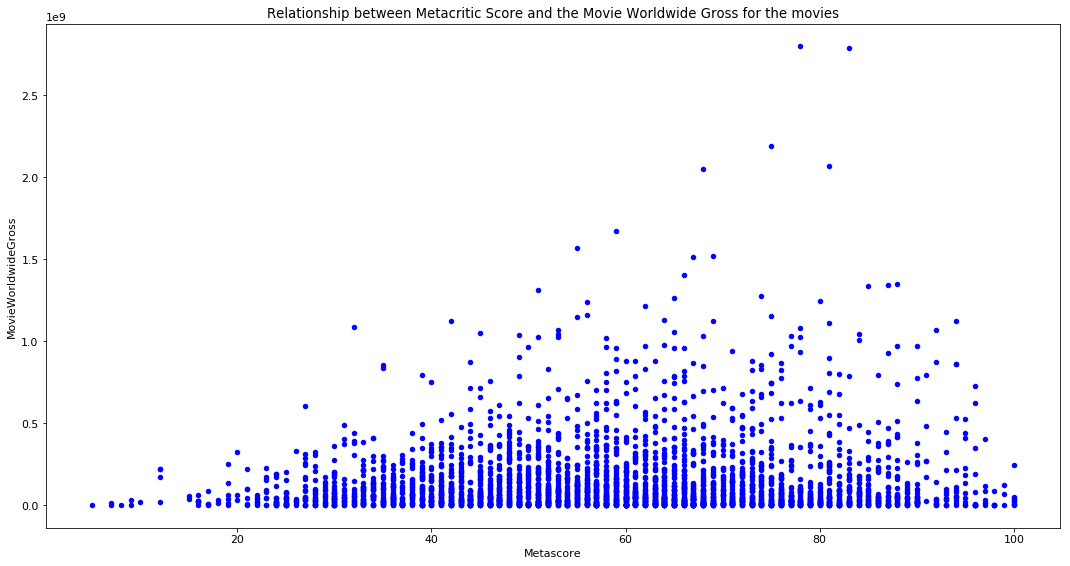

In [77]:
#4. MovieScore vs MovieWorldwideGross
plt.rcParams['font.size'] = 11
plt.rcParams['figure.figsize'] = (15.0, 8.0)
movieData.plot(kind = 'scatter', x='Metascore', y='MovieWorldwideGross', color='Blue')
plt.title("Relationship between Metacritic Score and the Movie Worldwide Gross for the movies")
plt.tight_layout()

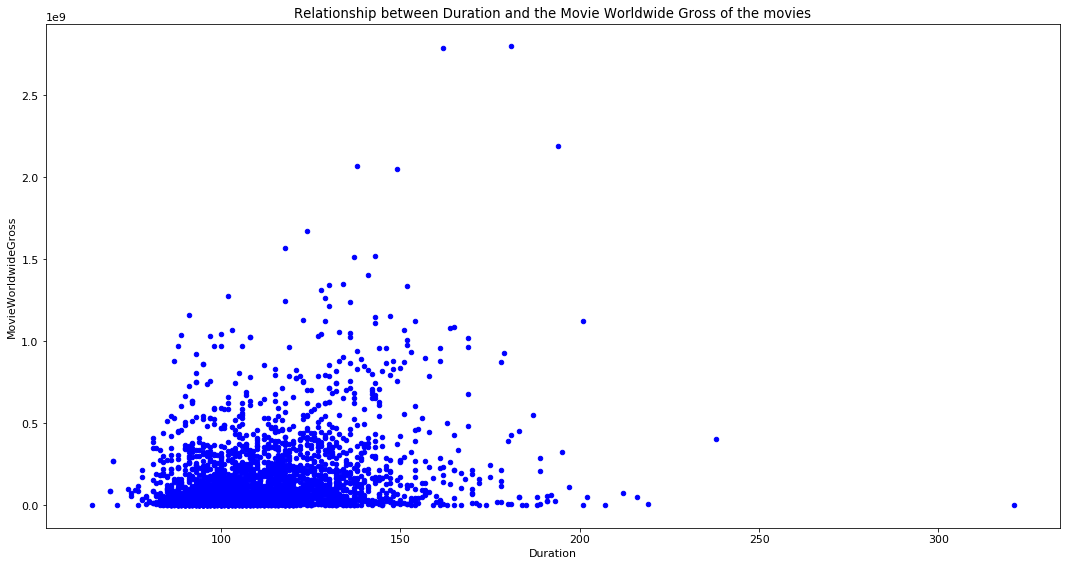

In [27]:
#5. Duration vs MovieWorldwideGross
plt.rcParams['font.size'] = 11
plt.rcParams['figure.figsize'] = (15.0, 8.0)
movieData.plot(kind = 'scatter', x='Duration', y='MovieWorldwideGross', color='Blue')
plt.title("Relationship between Duration and the Movie Worldwide Gross of the movies")
plt.tight_layout()

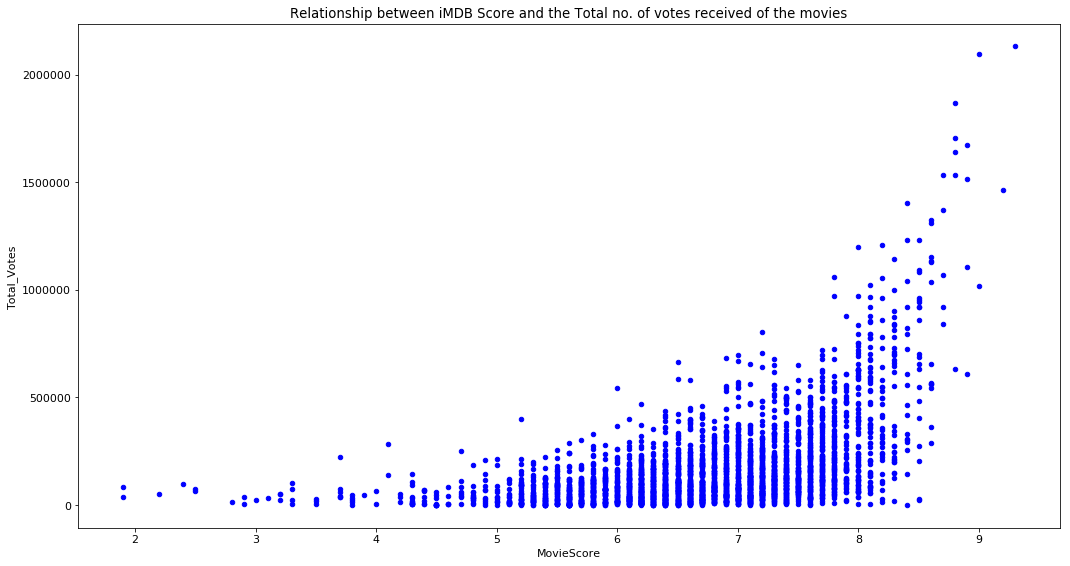

In [28]:
#6. MovieScore vs Total_Votes
plt.rcParams['font.size'] = 11
plt.rcParams['figure.figsize'] = (15.0, 8.0)
movieData.plot(kind = 'scatter', x='MovieScore', y='Total_Votes', color='Blue')
plt.title("Relationship between iMDB Score and the Total no. of votes received of the movies")
plt.tight_layout()

In [45]:
#Applying Logistic Regression to predict iMDB Score from the given Metacritic Score, Duration of the Movie, Total Worldwide Gross
#and the Total Votes received by the movie.

#Preparing the data for training and testing
features = ['Metascore', 'Duration', 'MovieWorldwideGross', 'Total_Votes']
target = ['MovieScore']

train, test = train_test_split(movieData, test_size = 0.3)

X_train = train[features]
#X_train = preprocessing.normalize(train[features])
Y_train = train[target]
X_test = test[features]
#X_test = preprocessing.normalize(test[features])
Y_test = test[target]
'''
print(X_train.head)
print(Y_train.head)
'''

'\nprint(X_train.head)\nprint(Y_train.head)\n'

In [46]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2204, 4)
(2204, 1)
(945, 4)
(945, 1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 108)               540       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1090      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,641
Trainable params: 1,641
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
2204/2204 [==============================] - 2s 736us/step - loss: 5.7389 - mean_absolute_error: 5.7389
Epoch 2/20
2204/2204 [==============================] - 0s 87us/step - loss: 5.7389 - mean_absolute_error: 5.7389
Epoch 3/20
2204/2204 [==============================] - 0s 94us/step - loss: 5.7389 - mean_absolute_error: 5.7389
Epoch 4/20
2204/2204 [==============================] - 

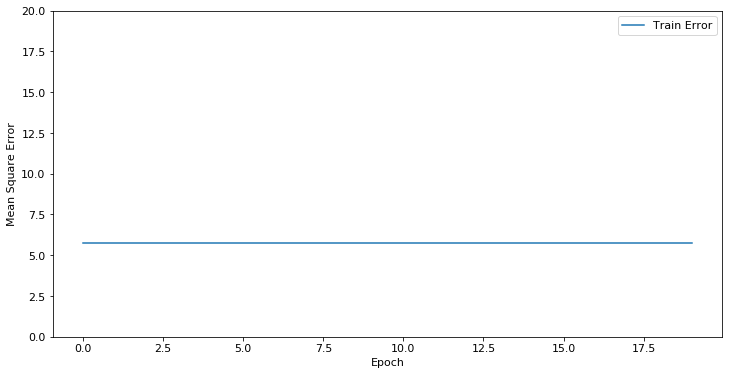

In [57]:
#Defining the sequential model
'''
model  = models.Sequential()
model.add(layers.Dense(108, activation='relu', input_shape=(4,), kernel_initializer='uniform'))
model.add(layers.Dense(10, activation='relu', kernel_initializer='uniform'))
model.add(layers.Dense(1, activation='softmax'))

#Compiling the model
newSGD = SGD(lr=0.1, decay=1e-6, momentum=0.9)
model.compile(optimizer=newSGD, loss='mean_absolute_error', metrics=['mean_absolute_error'])

print(model.summary())

trained_model = model.fit(X_train, Y_train, epochs = 20)

score = model.evaluate(X_test, Y_test)
Y_pred = model.predict(X_test)

print("Model score: ", score)

plt.figure(1, figsize=(12, 6))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(range(0, 20), trained_model.history['mean_absolute_error'],
       label='Train Error')
plt.ylim([0,20])
plt.legend()
plt.show()
'''

In [48]:
#Prediction using Linear Regression
logreg = LinearRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_log

60.7